<a href="https://colab.research.google.com/github/jinnyjinny/DogFaceClassification/blob/master/landmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 실행 전에 주의할 점

- GPU 가속기에서 코드 실행 (CPU에서 실행 불가)

# Dependency

In [8]:
!pip install face_recognition

In [5]:
import keras
import tensorflow as tf
import dlib, cv2, os 
from imutils import face_utils # imutils : 이미지  처리, dlib shape -> numpy ndarray로 자동변환
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import os
import csv

# Visualized Sample Image


Detection 0: Left: 64 Top: 113 Right: 206 Bottom: 255 Confidence: 1.0316259860992432


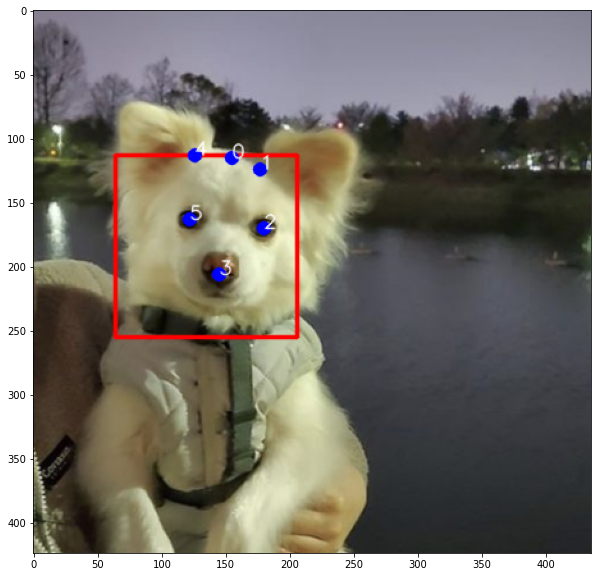

In [9]:
##### Load Model #####
detector = dlib.cnn_face_detection_model_v1('/content/drive/My Drive/Cap/dogHeadDetector.dat')
predictor = dlib.shape_predictor('/content/drive/My Drive/Cap/landmarkDetector.dat')

img_path = '/content/drive/My Drive/Cap/data/real/train/zzo/zzo_2.png'
filename, ext = os.path.splitext(os.path.basename(img_path))
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect Face
dets = detector(img, upsample_num_times=1)
img_result = img.copy()

for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()

    cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)

# Detect Landmarks
shapes = []

for i, d in enumerate(dets):
    shape = predictor(img, d.rect)
    shape = face_utils.shape_to_np(shape)
    re = shape.reshape(-1) # x0 y0 x1 y1 x2 y2 x3 y3 x4 y4 x5 y5     
    for i, p in enumerate(shape):
        shapes.append(shape)
        cv2.circle(img_result, center=tuple(p), radius=5, color=(0,0,255), thickness=-5, lineType=cv2.LINE_AA)
        cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)

img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(10, 10))
plt.imshow(img_result)

# Ratio between two eyes and nose

In [11]:
def landmark_ratio(DOG_FOLDER_PATH):

    ##### Load Model #####
    detector = dlib.cnn_face_detection_model_v1('/content/drive/My Drive/Cap/dogHeadDetector.dat')
    predictor = dlib.shape_predictor('/content/drive/My Drive/Cap/landmarkDetector.dat')

    ##### Load Image #####
    dog_folder_path = DOG_FOLDER_PATH
    dog_folder_list = os.listdir(dog_folder_path)
    dog_folder_list.sort()
    
    landmarks = {}
    for f in dog_folder_list:
        img_path = dog_folder_path + '/' + f
        img = cv2.imread(img_path)
        index = str(f.split('.')[0]) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ##### Detect Face #####
        dets = detector(img, upsample_num_times=1)
        img_result = img.copy()

        for i, d in enumerate(dets):
            #print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))
            x1, y1 = d.rect.left(), d.rect.top()
            x2, y2 = d.rect.right(), d.rect.bottom()
            cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
        
        
        ##### Detect Landmarks #####
        for i, d in enumerate(dets):
            shape = predictor(img, d.rect) # detect in range of d.rect 
            shape = face_utils.shape_to_np(shape)
            shape = shape.reshape(-1) # x0 y0 x1 y1 x2 y2 x3 y3 x4 y4 x5 y5
            ##### Landmarks Ratio #####
            x3 = int(shape[6])
            y3 = int(shape[7])
            x5 = int(shape[10])
            y5 = int(shape[11])
            x2 = int(shape[4])
            y2 = int(shape[5])
            area = abs ( (x5 - x3) * (y2 - y3) - (y5 - y3) * (x2 - x3) )
            AB = ( (x5 - x2) ** 2 + (y5 - y2) ** 2 ) ** 0.5
            tri_zone =  (area / AB) * 0.01
            tri_zone = [round(tri_zone, 4)]

            ##### Save CSV #####
            id = str(landmarks.keys())
            df = pd.DataFrame(tri_zone, index = ['tri_zone'])
            df = df.T
            print(df)
         
            with open(TOTAL_FOLDER_PATH + '/train_tri_landmark_0729.csv','a',newline='') as file :
                writer = csv.writer(file)
                writer.writerow(tri_zone)

In [12]:
DOG_FOLDER_PATH = '/content/drive/My Drive/Cap/data/real/train/zzo'
TOTAL_FOLDER_PATH = '/content/drive/My Drive/Cap/data/real'

with open(TOTAL_FOLDER_PATH + '/train_tri_landmark_0729.csv','w',newline='') as file :
      writer = csv.writer(file)
      writer.writerow(['tri_zone'])

In [13]:
zzo_folder_landmark = landmark_ratio(DOG_FOLDER_PATH)

   tri_zone
0    1.2009
   tri_zone
0    0.3993
   tri_zone
0    0.5345
   tri_zone
0    0.3379
   tri_zone
0    0.5661
